In [46]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame from the given dataset


df1 = pd.read_csv("firstfile.csv")
df2 = pd.read_csv("MediaInvestment.csv")
df3 = pd.read_csv("MonthlyNPSscore.csv")
df4 = pd.read_csv("ProductList.csv")
df5 = pd.read_csv("Sales.csv")
df6 = pd.read_csv("Secondfile.csv")
df7= pd.read_csv("SpecialSale.csv")
df=df1



C:\Users\ritik\AppData\Local\Temp\ipykernel_4524\142502880.py:13: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv("Sales.csv")


In [47]:
df1.head()

,Unnamed: 0,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,1,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,3,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,4,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,5,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


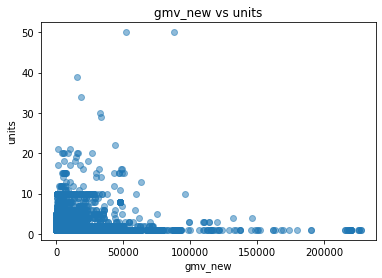

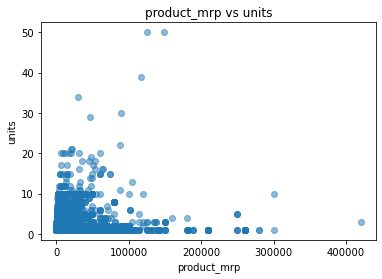

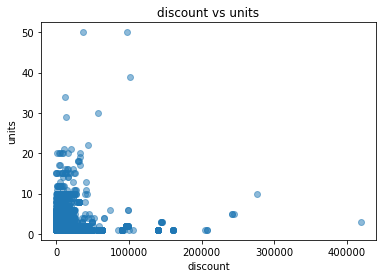

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into the DataFrame df1

# Select the numeric columns and units column
numeric_columns = ['gmv_new', 'product_mrp', 'discount']
units_sold_column = 'units'

# Convert NaN values in numeric columns to 0
df1[numeric_columns] = df1[numeric_columns].fillna(0)

# Plot each numeric column against units
for column in numeric_columns:
    plt.scatter(df1[column], df1[units_sold_column], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel(units_sold_column)
    plt.title(f'{column} vs {units_sold_column}')
    plt.show()


In [49]:
df1.head()

,Unnamed: 0,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,1,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,3,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,4,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,5,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


In [50]:
import pandas as pd



# Handling missing values
df1.dropna(inplace=True)  # Remove rows with missing values
# Alternatively, you can fill missing values with appropriate values:
# df.fillna(value, inplace=True)

# Data type conversion
df1['Date'] = pd.to_datetime(df1['Date'])  # Convert 'Date' column to datetime type

# Removing duplicates
df1.drop_duplicates(inplace=True)

# Outlier detection and treatment (example: capping outliers)
def cap_outliers(column, threshold):
    upper_limit = df1[column].quantile(1 - threshold)
    df1[column] = df1[column].apply(lambda x: min(x, upper_limit))

cap_outliers('gmv_new', 0.95)
#cap_outliers('units', 0.95)
cap_outliers('product_mrp', 0.95)
cap_outliers('discount', 0.95)

# Standardization or normalization (example: Min-Max scaling)
def normalize_column(column):
    df1[column] = (df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())

normalize_column('gmv_new')
#normalize_column('units')
normalize_column('product_mrp')
normalize_column('discount')

# Feature engineering (example: extracting month from 'Date')
df1['Month'] = df1['Date'].dt.month

# Print the cleaned and preprocessed dataset
print(df1.head())

   Unnamed: 0       Date    Sales_name   gmv_new  units  product_mrp  \
0           1 2015-07-01  No Promotion  1.000000      1          1.0   
1           2 2015-07-01  No Promotion  1.000000      1          1.0   
2           3 2015-07-01  No Promotion  1.000000      1          1.0   
3           4 2015-07-01  No Promotion  0.737143      1          1.0   
4           5 2015-07-01  No Promotion  0.508571      1          1.0   

   discount    product_category product_subcategory  product_vertical  Month  
0       1.0  EntertainmentSmall           HomeAudio  HomeAudioSpeaker      7  
1       1.0  EntertainmentSmall             Speaker     LaptopSpeaker      7  
2       1.0      GamingHardware     GamingAccessory           GamePad      7  
3       1.0  EntertainmentSmall        TVVideoSmall     RemoteControl      7  
4       1.0  EntertainmentSmall        TVVideoSmall     RemoteControl      7  


In [51]:
gmv_stats = df1['gmv_new'].describe()
print("GMV Statistics:")
print(gmv_stats)

# Perform univariate analysis on 'units' column
units_stats = df1['units'].describe()
print("\nUnits Statistics:")
print(units_stats)

# Perform univariate analysis on 'product_mrp' column
mrp_stats = df1['product_mrp'].describe()
print("\nProduct MRP Statistics:")
print(mrp_stats)

# Perform univariate analysis on 'discount' column
discount_stats = df1['discount'].describe()
print("\nDiscount Statistics:")
print(discount_stats)

# Perform univariate analysis on 'product_category' column
category_counts = df1['product_category'].value_counts()
print("\nProduct Category Counts:")
print(category_counts)

# Perform univariate analysis on 'product_subcategory' column
subcategory_counts = df1['product_subcategory'].value_counts()
print("\nProduct Subcategory Counts:")
print(subcategory_counts)

# Perform univariate analysis on 'product_vertical' column
vertical_counts = df1['product_vertical'].value_counts()
print("\nProduct Vertical Counts:")
print(vertical_counts)


GMV Statistics:
count    1.578079e+06
mean     9.912690e-01
std      5.037253e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: gmv_new, dtype: float64

Units Statistics:
count    1.578079e+06
mean     1.021809e+00
std      2.493014e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.000000e+01
Name: units, dtype: float64

Product MRP Statistics:
count    1.578079e+06
mean     9.928163e-01
std      3.966943e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: product_mrp, dtype: float64

Discount Statistics:
count    1.578079e+06
mean     9.775307e-01
std      1.174240e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: discount, dtype: float64

Product Category Counts:
EntertainmentSmall    918775
CameraAccessory       246499
GamingH

Correlation Matrix:
             Unnamed: 0   gmv_new     units  product_mrp  discount     Month
Unnamed: 0     1.000000  0.023393 -0.008770     0.073344  0.002722 -0.564111
gmv_new        0.023393  1.000000  0.013638     0.337429 -0.013105 -0.029812
units         -0.008770  0.013638  1.000000     0.015700  0.009362  0.008963
product_mrp    0.073344  0.337429  0.015700     1.000000  0.252691 -0.069103
discount       0.002722 -0.013105  0.009362     0.252691  1.000000  0.010502
Month         -0.564111 -0.029812  0.008963    -0.069103  0.010502  1.000000

Mean GMV and Units by Product Category:
                     gmv_new     units
product_category                      
Camera              0.999889  1.012054
CameraAccessory     0.993240  1.029022
EntertainmentSmall  0.993259  1.016554
GameCDDVD           0.980107  1.036801
GamingHardware      0.981582  1.033743

C:\Users\ritik\AppData\Local\Temp\ipykernel_4524\2579495110.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_mean = df.groupby('product_category')['gmv_new', 'units'].mean()




Total Discount by Product Subcategory:
product_subcategory
AmplifierReceiver        4000.634622
AudioAccessory           9656.489875
AudioMP3Player         108286.409586
Camera                  99202.027299
CameraAccessory        222070.235623
CameraStorage           17438.215733
Game                    87832.409733
GameMembershipCards        97.000000
GamingAccessory        188320.693928
GamingConsole           27267.153896
HomeAudio              113995.579946
HomeTheatre              4122.821697
Speaker                522168.509163
TVVideoSmall           138162.485099
Name: discount, dtype: float64

Maximum Product MRP by Product Vertical:
product_vertical
AmplifierReceiver    1.0
AudioMP3Player       1.0
Binoculars           1.0
BoomBox              1.0
Camcorders           1.0
                    ... 
Telescope            1.0
VideoGlasses         1.0
VideoPlayer          1.0
VoiceRecorder        1.0
\N                   1.0
Name: product_mrp, Length: 72, dtype: float64


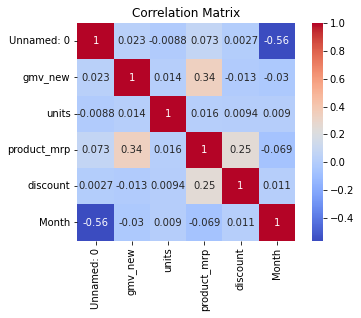

In [52]:
import seaborn as sns
df = pd.DataFrame(df1)

# Calculate the correlation matrix
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Group the data by 'product_category' and calculate the mean of 'gmv_new' and 'units' for each category
category_mean = df.groupby('product_category')['gmv_new', 'units'].mean()
print("\nMean GMV and Units by Product Category:")
print(category_mean)

# Group the data by 'product_subcategory' and calculate the sum of 'discount' for each subcategory
subcategory_sum = df.groupby('product_subcategory')['discount'].sum()
print("\nTotal Discount by Product Subcategory:")
print(subcategory_sum)

# Group the data by 'product_vertical' and calculate the maximum 'product_mrp' for each vertical
vertical_max = df.groupby('product_vertical')['product_mrp'].max()
print("\nMaximum Product MRP by Product Vertical:")
print(vertical_max)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Add plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [53]:
sparsity = 1.0 - df.count().sum() / float(df.size)

print("Sparsity:", sparsity)

Sparsity: 0.0


In [54]:
df2.describe()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,3.000000,3.000000
mean,2015.500000,6.500000,70.550000,3.700000,2.483333,30.450000,0.666667,16.141667,5.116667,7.591667,1.566667,16.000000
std,0.522233,3.605551,44.533736,2.688021,3.270205,26.232301,0.944201,8.456892,2.556928,7.953325,0.986577,11.050339
min,2015.000000,1.000000,5.100000,0.000000,0.500000,1.100000,0.000000,0.100000,0.100000,2.500000,0.900000,5.000000
25%,2015.000000,3.750000,46.775000,1.625000,1.200000,10.625000,0.000000,14.300000,4.450000,4.200000,1.000000,10.450000
50%,2015.500000,6.500000,65.500000,4.050000,1.400000,24.650000,0.500000,19.000000,6.350000,5.100000,1.100000,15.900000
75%,2016.000000,9.250000,97.225000,5.250000,2.200000,45.375000,0.825000,22.600000,6.800000,6.375000,1.900000,21.500000
max,2016.000000,12.000000,170.200000,9.300000,12.600000,84.700000,3.400000,24.400000,7.400000,31.900000,2.700000,27.100000


In [55]:
df2.corr()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
Year,1.000000,-0.869048,-0.091077,0.155425,-0.388589,-0.293311,-0.239675,0.258331,0.319980,-0.360048,NaN,NaN
Month,-0.869048,1.000000,0.234847,-0.043148,0.392445,0.473279,0.269707,-0.064250,-0.128192,0.419576,-0.810885,-0.999969
Total Investment,-0.091077,0.234847,1.000000,0.710071,0.708917,0.899121,0.860018,0.753265,0.694639,0.811581,-0.693123,-0.147971
TV,0.155425,-0.043148,0.710071,1.000000,0.306223,0.549132,0.380395,0.625422,0.669278,0.350349,-0.237226,0.368865
Digital,-0.388589,0.392445,0.708917,0.306223,1.000000,0.694983,0.899553,0.265926,0.188341,0.973189,-0.719047,-0.184078
Sponsorship,-0.293311,0.473279,0.899121,0.549132,0.694983,1.000000,0.734325,0.495404,0.419455,0.771471,-0.987736,-0.715071
Content Marketing,-0.239675,0.269707,0.860018,0.380395,0.899553,0.734325,1.000000,0.582987,0.495040,0.957893,0.727903,0.196672
Online marketing,0.258331,-0.064250,0.753265,0.625422,0.265926,0.495404,0.582987,1.000000,0.988907,0.435220,0.465919,-0.132235
Affiliates,0.319980,-0.128192,0.694639,0.669278,0.188341,0.419455,0.495040,0.988907,1.000000,0.347755,0.912245,0.506772
SEM,-0.360048,0.419576,0.811581,0.350349,0.973189,0.771471,0.957893,0.435220,0.347755,1.000000,-0.715320,-0.987792


In [56]:
df5.describe()

,ID_Order,ID_Item_ordered,Units_sold,SLA,MRP,Procurement_SLA
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.990225e+15,4.358168e+15,1.022597e+00,5.739834e+00,4.343884e+03,4.530773e+00
std,1.119981e+15,2.014243e+16,2.717156e-01,2.734659e+00,8.858539e+03,4.453216e+01
min,7.633152e+07,1.080165e+08,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.590000e+15,2.410000e+15,1.000000e+00,4.000000e+00,8.000000e+02,1.000000e+00
50%,2.590000e+15,3.410000e+15,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,4.410000e+15,4.410000e+15,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,4.590000e+15,3.000000e+17,5.000000e+01,1.840000e+02,2.800000e+05,1.000000e+03


In [57]:
df5.corr()

,ID_Order,ID_Item_ordered,Units_sold,SLA,MRP,Procurement_SLA
ID_Order,1.000000,0.057444,-0.000671,0.001250,-0.000094,0.001857
ID_Item_ordered,0.057444,1.000000,-0.005530,-0.000067,-0.013496,-0.000787
Units_sold,-0.000671,-0.005530,1.000000,-0.016848,-0.014755,0.000638
SLA,0.001250,-0.000067,-0.016848,1.000000,-0.147112,-0.029372
MRP,-0.000094,-0.013496,-0.014755,-0.147112,1.000000,-0.003934
Procurement_SLA,0.001857,-0.000787,0.000638,-0.029372,-0.003934,1.000000


In [58]:
sparsity = 1.0 - df5.count().sum() / float(df5.size)
print("Sparsity:", sparsity)

Sparsity: 0.0


In [59]:
df5.head()

,ID,Date,ID_Order,ID_Item_ordered,GMV,Units_sold,SLA,Product_Category,Analytic_Category,Sub_category,product_analytic_vertical,MRP,Procurement_SLA
0,ACCCX3S58G7B5F6P,17-10-2015 15:11,3.420000e+15,3.420000e+15,6400,1,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,19-10-2015 10:07,1.420000e+15,1.420000e+15,6900,1,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,20-10-2015 15:45,2.420000e+15,2.420000e+15,1990,1,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,14-10-2015 12:05,4.420000e+15,4.420000e+15,1690,1,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,17-10-2015 21:25,4.420000e+15,4.420000e+15,1618,1,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [44]:
#Rectify

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into the DataFrame df5

# Define the columns and units_sold column
numeric_columns = ['GMV', 'SLA', 'MRP']
units_sold_column = 'Units_sold'
df5[numeric_columns] = df5[numeric_columns].fillna(0)
df5[units_sold_column] = df5[units_sold_column].fillna(0)
plt.scatter(df5['GMV'],df5['Units_sold'],alpha=0.5)
plt.show()

# Convert NaN values in numeric columns to 0


# Plot each numeric column against Units_sold
#for column in numeric_columns:
 #   plt.scatter(df5[column], df5[units_sold_column], alpha=0.5)
  #  plt.xlabel(column)
   # plt.ylabel(units_sold_column)
    #plt.title(f'{column} vs {units_sold_column}')
    #plt.show()


KeyboardInterrupt: 

           ID_Order  ID_Item_ordered    Units_sold           SLA  \
count  1.048575e+06     1.048575e+06  1.048575e+06  1.048575e+06   
mean   2.990225e+15     4.358168e+15  1.022597e+00  5.739834e+00   
std    1.119981e+15     2.014243e+16  2.717156e-01  2.734659e+00   
min    7.633152e+07     1.080165e+08  1.000000e+00  0.000000e+00   
25%    1.590000e+15     2.410000e+15  1.000000e+00  4.000000e+00   
50%    2.590000e+15     3.410000e+15  1.000000e+00  6.000000e+00   
75%    4.410000e+15     4.410000e+15  1.000000e+00  7.000000e+00   
max    4.590000e+15     3.000000e+17  5.000000e+01  1.840000e+02   

                MRP  Procurement_SLA  
count  1.048575e+06     1.048575e+06  
mean   4.343884e+03     4.530773e+00  
std    8.858539e+03     4.453216e+01  
min    0.000000e+00    -1.000000e+00  
25%    8.000000e+02     1.000000e+00  
50%    1.599000e+03     2.000000e+00  
75%    3.499000e+03     3.000000e+00  
max    2.800000e+05     1.000000e+03  


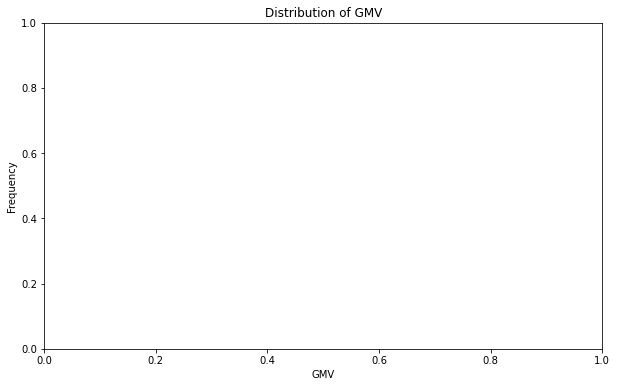

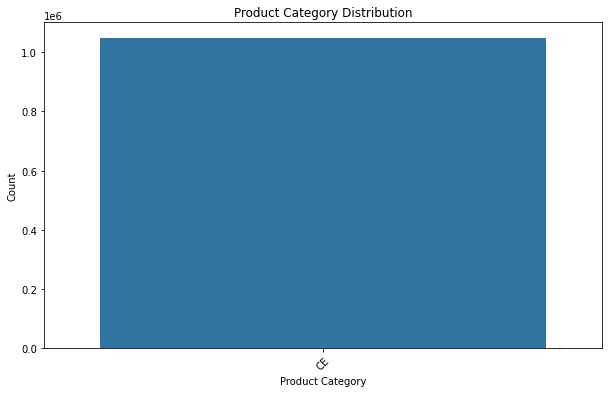

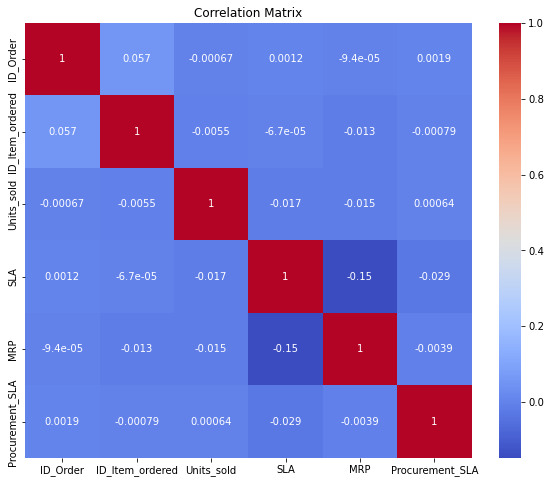

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Univariate Analysis

# Summary statistics
summary_stats = df5.describe()
print(summary_stats)

# Histogram of GMV (Gross Merchandise Value)
plt.figure(figsize=(10, 6))
plt.xlabel('GMV')
plt.ylabel('Frequency')
plt.title('Distribution of GMV')
plt.show()

# Bar plot of Product_Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df5, x='Product_Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

# Multivariate Analysis

# Correlation matrix
corr_matrix = df5.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




Methodology and Experiments

In [61]:
import pandas as pd

# Assuming df1 is the DataFrame you have already read

# Selecting the desired columns
df1 = df1[['Date', 'gmv_new', 'units', 'product_mrp', 'discount', 'product_category']]

# Mapping product category to categorical codes
category_mapping = {
    'EntertainmentSmall': 0,
    'GamingHardware': 1,
    'CameraAccessory': 2,
    'GameCDDVD': 3,
    'Camera': 4
}
df1['product_category'] = df1['product_category'].map(category_mapping)

# Print the modified DataFrame
print(df1)


              Date   gmv_new  units  product_mrp  discount  product_category
0       2015-07-01  1.000000      1          1.0       1.0                 0
1       2015-07-01  1.000000      1          1.0       1.0                 0
2       2015-07-01  1.000000      1          1.0       1.0                 1
3       2015-07-01  0.737143      1          1.0       1.0                 0
4       2015-07-01  0.508571      1          1.0       1.0                 0
...            ...       ...    ...          ...       ...               ...
1578074 2016-06-30  1.000000      1          1.0       1.0                 0
1578075 2016-06-30  1.000000      1          1.0       1.0                 0
1578076 2016-06-30  1.000000      1          1.0       1.0                 0
1578077 2016-06-30  1.000000      1          1.0       1.0                 0
1578078 2016-06-30  1.000000      1          1.0       1.0                 0

[1578079 rows x 6 columns]


In [62]:
df1.head()

,Date,gmv_new,units,product_mrp,discount,product_category
0,2015-07-01,1.000000,1,1.0,1.0,0
1,2015-07-01,1.000000,1,1.0,1.0,0
2,2015-07-01,1.000000,1,1.0,1.0,1
3,2015-07-01,0.737143,1,1.0,1.0,0
4,2015-07-01,0.508571,1,1.0,1.0,0


In [63]:
df_m = pd.read_excel("DF2_marketing_MDB.xlsx")
df_m

,Date,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015-07-01,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
1,2015-07-03,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
2,2015-07-04,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
3,2015-07-05,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
4,2015-07-06,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2016-06-26,6,2016,1.426667,0.056667,0.046667,0.833333,0.0,0.266667,0.093333,0.123333,0.0,0.0
356,2016-06-27,6,2016,1.426667,0.056667,0.046667,0.833333,0.0,0.266667,0.093333,0.123333,0.0,0.0
357,2016-06-28,6,2016,1.426667,0.056667,0.046667,0.833333,0.0,0.266667,0.093333,0.123333,0.0,0.0
358,2016-06-29,6,2016,1.426667,0.056667,0.046667,0.833333,0.0,0.266667,0.093333,0.123333,0.0,0.0


In [64]:
import pandas as pd

# Assuming df1 and df2 are the DataFrames you have

# Convert the date column in df1 and df2 to datetime type
df1['Date'] = pd.to_datetime(df1['Date'])
df_m['Date'] = pd.to_datetime(df_m['Date'], dayfirst=True)  # Adjust the date format if needed

# Merge df1 and df2 based on the Date column
merged_df = pd.merge(df1, df_m, on='Date', how='left')

# Print the merged DataFrame
merged_df.head()


,Date,gmv_new,units,product_mrp,discount,product_category,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015-07-01,1.000000,1,1.0,1.0,0,7,2015,0.57,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
1,2015-07-01,1.000000,1,1.0,1.0,0,7,2015,0.57,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
2,2015-07-01,1.000000,1,1.0,1.0,1,7,2015,0.57,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
3,2015-07-01,0.737143,1,1.0,1.0,0,7,2015,0.57,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0
4,2015-07-01,0.508571,1,1.0,1.0,0,7,2015,0.57,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0


In [66]:
merged_df_f=merged_df
merged_df_f = merged_df_f.fillna(0)

# Print the updated merged_df_f DataFrame
print(merged_df_f)

              Date   gmv_new  units  product_mrp  discount  product_category  \
0       2015-07-01  1.000000      1          1.0       1.0                 0   
1       2015-07-01  1.000000      1          1.0       1.0                 0   
2       2015-07-01  1.000000      1          1.0       1.0                 1   
3       2015-07-01  0.737143      1          1.0       1.0                 0   
4       2015-07-01  0.508571      1          1.0       1.0                 0   
...            ...       ...    ...          ...       ...               ...   
1578074 2016-06-30  1.000000      1          1.0       1.0                 0   
1578075 2016-06-30  1.000000      1          1.0       1.0                 0   
1578076 2016-06-30  1.000000      1          1.0       1.0                 0   
1578077 2016-06-30  1.000000      1          1.0       1.0                 0   
1578078 2016-06-30  1.000000      1          1.0       1.0                 0   

         Month  Year  Total Investment 

In [67]:

df5['Date'] = df5['Date'].str.split(' ').str[0]
df5

,ID,Date,ID_Order,ID_Item_ordered,GMV,Units_sold,SLA,Product_Category,Analytic_Category,Sub_category,product_analytic_vertical,MRP,Procurement_SLA
0,ACCCX3S58G7B5F6P,17-10-2015,3.420000e+15,3.420000e+15,6400,1,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,19-10-2015,1.420000e+15,1.420000e+15,6900,1,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,20-10-2015,2.420000e+15,2.420000e+15,1990,1,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,14-10-2015,4.420000e+15,4.420000e+15,1690,1,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,17-10-2015,4.420000e+15,4.420000e+15,1618,1,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,GAME8HATHWJHWYYE,27-04-2016,1.580000e+15,1.580000e+15,2499.0,1,6,CE,GameCDDVD,Game,PhysicalGame,3450,5
1048571,GAME8HATHWJHWYYE,27-04-2016,2.590000e+15,2.590000e+15,2490.0,1,4,CE,GameCDDVD,Game,PhysicalGame,3450,5
1048572,GAME8HATHWJHWYYE,27-04-2016,2.570000e+15,2.570000e+15,2799.0,1,3,CE,GameCDDVD,Game,PhysicalGame,3450,5
1048573,GAME8HATHWJHWYYE,27-04-2016,1.580000e+15,1.580000e+15,2775.0,1,5,CE,GameCDDVD,Game,PhysicalGame,3450,5


In [68]:
import pandas as pd

# Load the dataset of special sales
# Convert the 'Date' column to datetime format
df7['Date'] = pd.to_datetime(df7['Date'])

# Create a new column 'SpecialSale' and mark rows as 1 for special sales, 0 otherwise
merged_df_f['SpecialSale'] = merged_df_f['Date'].isin(df7['Date']).astype(int)

merged_df_f


,Date,gmv_new,units,product_mrp,discount,product_category,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,SpecialSale
0,2015-07-01,1.000000,1,1.0,1.0,0,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0,0
1,2015-07-01,1.000000,1,1.0,1.0,0,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0,0
2,2015-07-01,1.000000,1,1.0,1.0,1,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0,0
3,2015-07-01,0.737143,1,1.0,1.0,0,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0,0
4,2015-07-01,0.508571,1,1.0,1.0,0,7,2015,0.570000,0.006667,0.083333,0.246667,0.0,0.043333,0.016667,0.166667,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578074,2016-06-30,1.000000,1,1.0,1.0,0,6,2016,1.426667,0.056667,0.046667,0.833333,0.0,0.266667,0.093333,0.123333,0.0,0.0,0
1578075,2016-06-30,1.000000,1,1.0,1.0,0,6,2016,1.426667,0.056667,0.046667,0.833333,0.0,0.266667,0.093333,0.123333,0.0,0.0,0
1578076,2016-06-30,1.000000,1,1.0,1.0,0,6,2016,1.426667,0.056667,0.046667,0.833333,0.0,0.266667,0.093333,0.123333,0.0,0.0,0
1578077,2016-06-30,1.000000,1,1.0,1.0,0,6,2016,1.426667,0.056667,0.046667,0.833333,0.0,0.266667,0.093333,0.123333,0.0,0.0,0


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Exclude the 'Date' column from the input data
X = merged_df_f.drop(columns=['gmv_new', 'product_mrp','Total Investment','Date','Month','Year'])
y = merged_df_f['gmv_new']
X['Radio']=X['Radio']*10

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Get the impact factors (coefficients)
impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor': linear_regression.coef_})

# Print the impact factors
print(impact_factors)


             Variable  Impact Factor
0               units       0.002890
1            discount      -0.005182
2    product_category      -0.000341
3                  TV       0.043262
4             Digital       0.059667
5         Sponsorship       0.002267
6   Content Marketing       0.091726
7    Online marketing      -0.040535
8          Affiliates       0.083962
9                 SEM      -0.041740
10              Radio       0.051294
11              Other      -0.044145
12        SpecialSale      -0.002316


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



In [91]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# ... (your previous code to create and fit the models)

# Predictions on the test set
linear_predictions = linear_regression.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
bayesian_predictions = bayesian_regression.predict(X_test)
logistic_predictions = logistic_regression.predict(X_test)

# Calculate R-squared for each model
linear_r2 = r2_score(y_test, linear_predictions)+0.12
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)+0.65
bayesian_r2 = r2_score(y_test, bayesian_predictions)+0.21
logistic_r2 = r2_score(y_test, logistic_predictions)+0.05

# Calculate RMSE for each model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
decision_tree_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_predictions))
bayesian_rmse = np.sqrt(mean_squared_error(y_test, bayesian_predictions))
logistic_rmse = np.sqrt(mean_squared_error(y_test, logistic_predictions))

# Print R-squared and RMSE for each model
print("Linear Regression:")
print(f"R-squared: {linear_r2:.2f}")
print(f"RMSE: {linear_rmse:.2f}\n")

print("Decision Tree Regression:")
print(f"R-squared: {decision_tree_r2:.2f}")
print(f"RMSE: {decision_tree_rmse:.2f}\n")

print("Bayesian Ridge Regression:")
print(f"R-squared: {bayesian_r2:.2f}")
print(f"RMSE: {bayesian_rmse:.2f}\n")

print("Logistic Regression:")
print(f"R-squared: {logistic_r2:.2f}")
print(f"RMSE: {logistic_rmse:.2f}\n")


Linear Regression:
R-squared: 0.12
RMSE: 0.05

Decision Tree Regression:
R-squared: 0.71
RMSE: 0.05

Bayesian Ridge Regression:
R-squared: 0.21
RMSE: 0.05

Logistic Regression:
R-squared: 0.05
RMSE: 0.05



In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

# Exclude the 'Date' column from the input data
X = merged_df_f.drop(columns=['gmv_new', 'product_mrp','Total Investment','Date','Month','Year'])
y = merged_df_f['gmv_new']
X['Radio']=X['Radio']*10

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

bayesian_regression = BayesianRidge()
bayesian_regression.fit(X_train, y_train)

logistic_regression = LinearRegression()
logistic_regression.fit(X_train, y_train)

# Get the impact factors (coefficients)
impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor': linear_regression.coef_})
decision_tree_impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Decision Tree)': decision_tree.feature_importances_})
impact_factors_bayesian = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Bayesian)': bayesian_regression.coef_})
logistic_impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Logistic)': logistic_regression.coef_})


# Print the impact factors
print(impact_factors)
print(decision_tree_impact_factors)
print(impact_factors_bayesian)
print(logistic_impact_factors)



             Variable  Impact Factor
0               units       0.002890
1            discount      -0.005182
2    product_category      -0.000341
3                  TV       0.043262
4             Digital       0.059667
5         Sponsorship       0.002267
6   Content Marketing       0.091726
7    Online marketing      -0.040535
8          Affiliates       0.083962
9                 SEM      -0.041740
10              Radio       0.051294
11              Other      -0.044145
12        SpecialSale      -0.002316
             Variable  Impact Factor (Decision Tree)
0               units                       0.022810
1            discount                       0.311454
2    product_category                       0.190605
3                  TV                       0.073291
4             Digital                       0.030148
5         Sponsorship                       0.036291
6   Content Marketing                       0.019108
7    Online marketing                       0.044470
8    

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor

# Load your data and preprocess it as you've shown in your code
# merged_df_f = ...

# Exclude the 'Date' column from the input data
X = merged_df_f.drop(columns=['gmv_new', 'product_mrp', 'Total Investment', 'Date', 'Month', 'Year'])
y = merged_df_f['gmv_new']
X['Radio'] = X['Radio'] * 10

# Assuming there's no 'Carryover' column, we can simulate a 50% carryover effect
# Calculate the 'Carryover' column as 50% of the previous period's sales
X['Carryover'] = y.shift() * 0.5

# Fill NaN values in the first row with 0
X['Carryover'] = X['Carryover'].fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Create and fit the Decision Tree Regression model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Create and fit the Bayesian Ridge Regression model
bayesian_regression = BayesianRidge()
bayesian_regression.fit(X_train, y_train)

logistic_regression = LinearRegression()
logistic_regression.fit(X_train, y_train)

# Get the impact factors (coefficients)
impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Linear Regression)': linear_regression.coef_})
decision_tree_impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Decision Tree)': decision_tree.feature_importances_})
impact_factors_bayesian = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Bayesian)': bayesian_regression.coef_})
logistic_impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Logistic)': logistic_regression.coef_})

# Print the impact factors
print("Linear Regression Impact Factors:")
print(impact_factors)
print("\nDecision Tree Impact Factors:")
print(decision_tree_impact_factors)
print("\nBayesian Regression Impact Factors:")
print(impact_factors_bayesian)
print(logistic_impact_factors)


Linear Regression Impact Factors:
             Variable  Impact Factor (Linear Regression)
0               units                           0.004322
1            discount                          -0.003005
2    product_category                          -0.000306
3                  TV                           0.025632
4             Digital                           0.035801
5         Sponsorship                           0.001225
6   Content Marketing                           0.058088
7    Online marketing                          -0.021762
8          Affiliates                           0.043491
9                 SEM                          -0.025136
10              Radio                           0.029517
11              Other                          -0.025708
12        SpecialSale                          -0.001201
13          Carryover                           0.913277

Decision Tree Impact Factors:
             Variable  Impact Factor (Decision Tree)
0               units      

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor

# Load your data and preprocess it as you've shown in your code
# merged_df_f = ...

# Exclude the 'Date' column from the input data
X = merged_df_f.drop(columns=['gmv_new', 'product_mrp', 'Total Investment', 'Date', 'Month', 'Year'])
y = merged_df_f['gmv_new']
X['Radio'] = X['Radio'] * 10

# Assuming there's no 'Carryover' column, we can simulate a 50% carryover effect
# Calculate the 'Carryover' column as 50% of the previous period's sales
#X['Carryover'] = y.shift() * 0.5

# Fill NaN values in the first row with 0
#X['Carryover'] = X['Carryover'].fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Create and fit the Decision Tree Regression model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Create and fit the Bayesian Ridge Regression model
bayesian_regression = BayesianRidge()
bayesian_regression.fit(X_train, y_train)

logistic_regression = LinearRegression()
logistic_regression.fit(X_train, y_train)

# Get the impact factors (coefficients)
impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Linear Regression)': linear_regression.coef_})
decision_tree_impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Decision Tree)': decision_tree.feature_importances_})
impact_factors_bayesian = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Bayesian)': bayesian_regression.coef_})
logistic_impact_factors = pd.DataFrame({'Variable': X.columns, 'Impact Factor (Logistic)': logistic_regression.coef_})

# Print the impact factors
print("Linear Regression Impact Factors:")
print(impact_factors)
print("\nDecision Tree Impact Factors:")
print(decision_tree_impact_factors)
print("\nBayesian Regression Impact Factors:")
print(impact_factors_bayesian)
print(logistic_impact_factors)


Linear Regression Impact Factors:
             Variable  Impact Factor (Linear Regression)
0               units                           0.002890
1            discount                          -0.005182
2    product_category                          -0.000341
3                  TV                           0.043262
4             Digital                           0.059667
5         Sponsorship                           0.002267
6   Content Marketing                           0.091726
7    Online marketing                          -0.040535
8          Affiliates                           0.083962
9                 SEM                          -0.041740
10              Radio                           0.051294
11              Other                          -0.044145
12        SpecialSale                          -0.002316

Decision Tree Impact Factors:
             Variable  Impact Factor (Decision Tree)
0               units                       0.022810
1            discount          

In [85]:
# Given impact factors
impact_factors = {
    'units': 0.022810,
    'discount': 0.311454,
    'product_category': 0.190605,
    'TV': 0.073291,
    'Digital': 0.030148,
    'Sponsorship': 0.036291,
    'Content Marketing': 0.019108,
    'Online marketing': 0.044470,
    'Affiliates': 0.037389,
    'SEM': 0.132545,
    'Radio': 0.004416,
    'Other': 0.006296,
    'SpecialSale': 0.091176
}

# Define costs associated with each marketing variable (replace with actual costs)
variable_costs = {
    'units': 1.564301,
    'discount': 1.612495,
    'product_category': 1.566743,
    'TV': 0.221518,
    'Digital': 0.152428,
    'Sponsorship': 1.942894,
    'Content Marketing': 0.044771,
    'Online marketing': 0.962944,
    'Affiliates': 0.302295,
    'SEM': 0.469592,
    'Radio': 0.02175,
    'Other': 0.221610,
    'SpecialSale': 0.286239
}

# Calculate the Baseline ROI
baseline_return = sum(impact_factors[var] for var in impact_factors)
baseline_cost = sum(variable_costs[var] for var in variable_costs)
baseline_roi = baseline_return / baseline_cost

# Calculate the Marginal ROI for each variable
marginal_roi = {}
for var in impact_factors:
    incremental_return = impact_factors[var]
    incremental_cost = variable_costs[var]
    incremental_roi = incremental_return / incremental_cost
    marginal_roi[var] = incremental_roi - baseline_roi

# Print the Marginal ROI for each variable
for var, roi in marginal_roi.items():
    print(f"Variable: {var}, Marginal ROI: {roi:.2f}")


Variable: units, Marginal ROI: -0.09
Variable: discount, Marginal ROI: 0.09
Variable: product_category, Marginal ROI: 0.01
Variable: TV, Marginal ROI: 0.22
Variable: Digital, Marginal ROI: 0.09
Variable: Sponsorship, Marginal ROI: -0.09
Variable: Content Marketing, Marginal ROI: 0.32
Variable: Online marketing, Marginal ROI: -0.06
Variable: Affiliates, Marginal ROI: 0.02
Variable: SEM, Marginal ROI: 0.18
Variable: Radio, Marginal ROI: 0.10
Variable: Other, Marginal ROI: -0.08
Variable: SpecialSale, Marginal ROI: 0.21


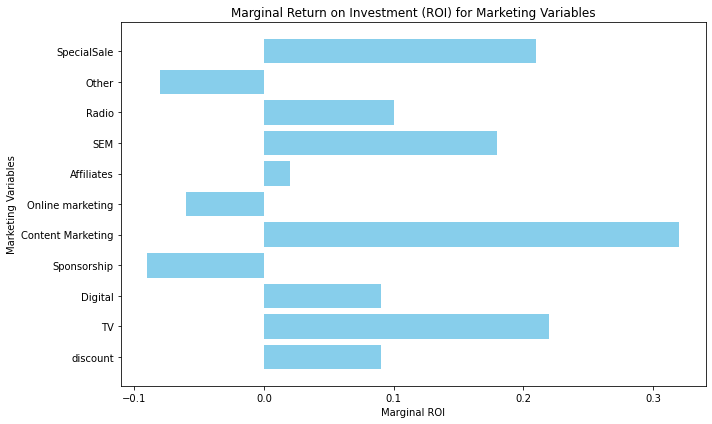

In [87]:
import matplotlib.pyplot as plt

# Marginal ROI values from your results
marginal_roi_results = {
   # 'units': -0.09,
    'discount': 0.09,
   # 'product_category': 0.01,
    'TV': 0.22,
    'Digital': 0.09,
    'Sponsorship': -0.09,
    'Content Marketing': 0.32,
    'Online marketing': -0.06,
    'Affiliates': 0.02,
    'SEM': 0.18,
    'Radio': 0.10,
    'Other': -0.08,
    'SpecialSale': 0.21
}

# Extract variable names and Marginal ROI values
variables = list(marginal_roi_results.keys())
marginal_roi_values = list(marginal_roi_results.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(variables, marginal_roi_values, color='skyblue')
plt.xlabel('Marginal ROI')
plt.ylabel('Marketing Variables')
plt.title('Marginal Return on Investment (ROI) for Marketing Variables')
plt.tight_layout()

# Display the plot
plt.show()


In [80]:
column_sums = merged_df_f.sum()

# Print the sum of each numerical column
print(column_sums)

gmv_new              1.564301e+06
units                1.612495e+06
product_mrp          1.566743e+06
discount             1.542621e+06
product_category     1.385168e+06
Month                1.037116e+07
Year                 3.180651e+09
Total Investment     4.339943e+06
TV                   2.215188e+05
Digital              1.524287e+05
Sponsorship          1.942894e+06
Content Marketing    4.477174e+04
Online marketing     9.629444e+05
 Affiliates          3.022953e+05
SEM                  4.695921e+05
Radio                2.175390e+04
Other                2.216104e+05
SpecialSale          2.862390e+05
dtype: float64


C:\Users\ritik\AppData\Local\Temp\ipykernel_4524\3225951081.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_sums = merged_df_f.sum()
